NOTE: run from root directory, not models directory

In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)

Fetch data from DB:

In [21]:
from data import StatcastData

statcast_data = StatcastData()
display(statcast_data.at_bats_df)
statcast_data.batter_games_df

,game_pk,at_bat,batter,pitcher,home,rhb,rhp,xBA,H,BIP,game_date,starter
0,413661,1,572761,452657,False,False,False,NaN,False,True,2015-04-05,True
1,413661,2,518792,452657,False,False,False,NaN,True,True,2015-04-05,True
2,413661,3,407812,452657,False,True,False,NaN,True,True,2015-04-05,True
3,413661,4,425509,452657,False,True,False,NaN,False,False,2015-04-05,True
4,413661,5,571431,452657,False,False,False,NaN,False,False,2015-04-05,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1481118,717071,57,650859,663941,True,False,True,0.034,False,True,2023-08-09,False
1481119,717071,62,660271,663941,True,False,True,NaN,False,False,2023-08-09,False
1481120,717071,63,592273,663941,True,True,True,0.077,False,True,2023-08-09,False
1481121,717071,64,519058,663941,True,False,True,0.001,False,True,2023-08-09,False


,game_pk,home,batter,PA,xH,H,BIP,HG,xHG,game_date,year,lineup,hp_to_1b,bats,team,opponent,opp_starter
0,413661,False,572761,5,1.767,2,5,True,True,2015-04-05,2015,1.0,4.28,L,STL,CHC,425794
1,413661,False,518792,5,1.666,3,5,True,True,2015-04-05,2015,2.0,4.36,L,STL,CHC,425794
2,413661,False,407812,5,0.653,2,3,True,False,2015-04-05,2015,3.0,4.54,R,STL,CHC,425794
3,413661,False,425509,5,0.540,1,3,True,False,2015-04-05,2015,4.0,4.75,R,STL,CHC,425794
4,413661,False,571431,4,0.107,0,2,False,False,2015-04-05,2015,5.0,4.71,L,STL,CHC,425794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409256,717071,True,543068,4,0.428,0,2,False,False,2023-08-09,2023,5.0,4.80,R,LAA,SF,660271
409257,717071,True,666160,3,0.106,0,1,False,False,2023-08-09,2023,6.0,4.37,L,LAA,SF,660271
409258,717071,True,592669,3,0.300,0,1,False,False,2023-08-09,2023,7.0,4.65,R,LAA,SF,660271
409259,717071,True,642136,3,0.060,0,2,False,False,2023-08-09,2023,8.0,4.84,L,LAA,SF,660271


Construct Features:

In [22]:
from data import GameDay

game_days, _ = list(), print('Gameday:')
for game_datetime in statcast_data.batter_games_df['game_date'].unique():
    print(game_datetime.strftime('%Y-%m-%d'), end = '\r', flush = True)
    game_days.append(GameDay(game_date = game_datetime.date(), statcast_data = statcast_data))
df = pd.concat([game_day.todays_batters_df for game_day in game_days], ignore_index = True)
df

Gameday:


,game_pk,PA,xH,H,BIP,HG,xHG,game_date,year,lineup,hp_to_1b,bats,team,G_50G,HG%_50G,xHG%_50G,PA_200PA,xH/PA_200PA,H/PA_200PA,BIP/PA_200PA,BF_200BF,xH/BF_200BF,H/BF_200BF,BIP/BF_200BF,opp_starter,rhp,PA_200PA_vs_p_hand,xH/PA_200PA_vs_p_hand,H/PA_200PA_vs_p_hand,BIP/PA_200PA_vs_p_hand,batter,home,PA_200PA_at_home_away,xH/PA_200PA_at_home_away,H/PA_200PA_at_home_away,BIP/PA_200PA_at_home_away,opponent,BF_400BF_bullpen,xH/BF_400BF_bullpen,H/BF_400BF_bullpen,BIP/BF_400BF_bullpen,BF_200BF_vs_b_hand,xH/BF_200BF_vs_b_hand,H/BF_200BF_vs_b_hand,BIP/BF_200BF_vs_b_hand
0,414390,4,0.860,1,3,True,False,2015-05-30,2015,4.0,5.05,R,OAK,50,0.68,0.42,200,0.287923,0.235,0.785,200,0.315796,0.210,0.765,534910,True,164,0.296938,0.243902,0.798780,456714,True,102,0.305912,0.235294,0.794118,NYY,400,0.263622,0.2500,0.720,112.0,0.230129,0.151786,0.767857
1,414401,4,1.014,1,3,True,True,2015-05-31,2015,2.0,4.51,R,DET,50,0.60,0.40,200,0.314864,0.230,0.765,200,0.347809,0.260,0.745,456034,False,51,0.305243,0.196078,0.784314,435079,False,108,0.326231,0.240741,0.759259,LAA,400,0.353479,0.2925,0.815,200.0,0.363821,0.225000,0.730000
2,414401,4,0.733,1,2,True,False,2015-05-31,2015,3.0,5.04,R,DET,50,0.70,0.48,200,0.429450,0.280,0.660,200,0.347809,0.260,0.745,456034,False,47,0.406931,0.234043,0.638298,408234,False,106,0.423304,0.311321,0.679245,LAA,400,0.353479,0.2925,0.815,200.0,0.363821,0.225000,0.730000
3,414401,4,0.614,0,2,False,False,2015-05-31,2015,4.0,4.33,R,DET,50,0.64,0.46,200,0.366131,0.265,0.710,200,0.347809,0.260,0.745,456034,False,43,0.297750,0.139535,0.604651,493316,False,106,0.357183,0.273585,0.716981,LAA,400,0.353479,0.2925,0.815,200.0,0.363821,0.225000,0.730000
4,414401,4,1.807,1,3,True,True,2015-05-31,2015,2.0,4.20,R,LAA,50,0.74,0.64,200,0.395880,0.260,0.680,200,0.315641,0.235,0.725,533167,True,170,0.399946,0.252941,0.664706,545361,True,105,0.389313,0.219048,0.666667,DET,400,0.335757,0.2475,0.775,108.0,0.299922,0.268519,0.722222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242044,717071,4,0.428,0,2,False,False,2023-08-09,2023,5.0,4.80,R,LAA,50,0.76,0.46,200,0.337438,0.235,0.720,200,0.340180,0.190,0.610,660271,True,200,0.343762,0.230000,0.715000,543068,True,200,0.349926,0.235000,0.675000,SF,400,0.323656,0.3000,0.800,200.0,0.319441,0.175000,0.560000
242045,717071,3,0.106,0,1,False,False,2023-08-09,2023,6.0,4.37,L,LAA,50,0.82,0.46,200,0.393529,0.280,0.625,200,0.340180,0.190,0.610,660271,True,200,0.427718,0.325000,0.625000,666160,True,200,0.341151,0.210000,0.595000,SF,400,0.323656,0.3000,0.800,200.0,0.340353,0.190000,0.595000
242046,717071,3,0.300,0,1,False,False,2023-08-09,2023,7.0,4.65,R,LAA,50,0.58,0.32,200,0.287758,0.225,0.675,200,0.340180,0.190,0.610,660271,True,200,0.308489,0.235000,0.695000,592669,True,200,0.330699,0.235000,0.680000,SF,400,0.323656,0.3000,0.800,200.0,0.319441,0.175000,0.560000
242047,717071,3,0.060,0,2,False,False,2023-08-09,2023,8.0,4.84,L,LAA,50,0.60,0.42,200,0.350941,0.180,0.590,200,0.340180,0.190,0.610,660271,True,200,0.329718,0.180000,0.620000,642136,True,200,0.371092,0.210000,0.595000,SF,400,0.323656,0.3000,0.800,200.0,0.340353,0.190000,0.595000


Variable Correlation

In [23]:
correlation_matrix = df[GameDay.features()].corr()
for row_num in range(len(correlation_matrix.index)):
    for col_num in range(len(correlation_matrix.columns)):
        if row_num <= col_num:
            correlation_matrix.iloc[row_num, col_num] = None
correlation_matrix.style.background_gradient(cmap = 'bwr', axis = None, vmin = -1, vmax = 1).highlight_null(color = '#f1f1f1').format(precision = 2) \
    .set_table_styles([
        {'selector': 'th.col_heading', 'props': [('text-align', 'left'), ('writing-mode', 'vertical-rl'), ('transform', 'rotateZ(192deg)')]},
        {'selector': 'td, th', 'props': [('border', '1px solid black !important')]}
    ])

,lineup,hp_to_1b,HG%_50G,xHG%_50G,xH/PA_200PA,H/PA_200PA,BIP/PA_200PA,xH/BF_200BF,H/BF_200BF,BIP/BF_200BF,xH/PA_200PA_vs_p_hand,H/PA_200PA_vs_p_hand,BIP/PA_200PA_vs_p_hand,xH/PA_200PA_at_home_away,H/PA_200PA_at_home_away,BIP/PA_200PA_at_home_away,xH/BF_400BF_bullpen,H/BF_400BF_bullpen,BIP/BF_400BF_bullpen,xH/BF_200BF_vs_b_hand,H/BF_200BF_vs_b_hand,BIP/BF_200BF_vs_b_hand
lineup,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
hp_to_1b,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HG%_50G,-0.41,-0.17,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
xHG%_50G,-0.45,-0.00,0.67,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
xH/PA_200PA,-0.27,0.14,0.32,0.49,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
H/PA_200PA,-0.34,-0.16,0.81,0.66,0.39,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
BIP/PA_200PA,-0.11,-0.09,0.43,0.48,-0.30,0.51,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
xH/BF_200BF,0.00,-0.00,-0.01,0.00,0.01,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
H/BF_200BF,-0.00,0.00,0.02,0.00,-0.01,0.02,0.03,0.56,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
BIP/BF_200BF,-0.01,0.00,0.02,0.00,-0.02,0.02,0.04,0.08,0.58,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Scale Data

https://stackoverflow.com/a/59164898

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df[GameDay.features()])
df = df.merge(pd.DataFrame(scaler.transform(df[GameDay.features()]), index = df.index, columns = [f'{feature}*' for feature in GameDay.features()]), left_index = True, right_index = True)

Train/Test Split

In [25]:
from sklearn.model_selection import train_test_split

train_game_dates, test_game_dates = train_test_split(df['game_date'].unique(), test_size = 0.3, random_state = 57)
X_train, X_test = df.loc[df['game_date'].isin(train_game_dates), GameDay.features()], df.loc[df['game_date'].isin(test_game_dates), GameDay.features()]
y_train, y_test = df.loc[df['game_date'].isin(train_game_dates), 'H'].astype(bool), df.loc[df['game_date'].isin(test_game_dates), 'H'].astype(bool)

Principal Component Analysis

To save/load PCA: https://datascience.stackexchange.com/a/55080

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.99, svd_solver = 'full', random_state = 57).fit(X_train)
print('# of features reduced from', len(X_train.columns), 'to', pca.n_components_)
X_train = pd.DataFrame(pca.transform(X_train), index = X_train.index, columns = [f'PC{f + 1}' for f in range(pca.n_components_)])
X_test = pd.DataFrame(pca.transform(X_test), index = X_test.index, columns = [f'PC{f + 1}' for f in range(pca.n_components_)])
_ = print('X_train:'), display(X_train), print('X_test:'), display(X_test), print('y_train distribution:'), display(y_train.value_counts()), print('y_test distribution:'), display(y_test.value_counts())

# of features reduced from 22 to 19
X_train:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-0.973651,-1.907546,1.816635,0.236241,-3.150932,2.625960,-0.497841,-1.088416,1.936223,-0.744396,-0.621612,-1.359987,-0.741142,0.654085,-0.766363,-0.186194,-0.184552,-0.134626,-0.030896
1,-0.586155,-1.745269,-1.340880,1.616678,0.659104,0.410344,-0.778128,-1.326252,0.461251,0.826650,-0.376709,0.377482,-0.673572,-0.094641,0.574424,0.627858,-0.328629,-0.549247,0.050121
2,-2.284603,3.933771,-2.490901,1.585116,0.529732,2.469011,-0.823507,-0.127471,0.831987,1.181200,0.273258,-0.877652,-0.842110,-0.145353,0.627467,0.911202,0.335945,-0.537999,-0.048915
3,-0.213020,0.278858,-1.769180,1.686514,0.594350,-0.570660,-0.915010,-0.521471,1.273593,1.629014,1.969833,0.735997,-0.748525,-0.094717,0.611333,1.054910,0.571604,-0.329267,0.491141
4,-2.299206,2.898497,-1.165488,0.848189,-1.008477,-0.828803,-0.725828,-0.448723,-0.446442,-0.630915,0.286117,1.535964,0.917754,-0.260095,-0.376316,-0.390358,-0.162388,-0.075142,0.200234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241832,3.333588,0.487632,-0.236456,-0.992756,-1.042213,-1.078245,0.839106,-0.239780,-0.379445,0.734973,-0.708531,0.941410,0.468978,-0.015050,0.150250,0.600786,0.079142,0.520587,0.049999
241833,2.783659,-1.224730,0.134388,-1.016694,-1.004675,1.240639,1.059304,-0.700749,-0.595602,0.094683,-0.537999,-1.080347,0.321230,-0.091478,0.132110,0.134088,0.549120,1.205366,-0.215510
241834,2.405243,1.988645,0.472694,-0.970505,-1.793463,-1.158579,0.839115,0.462331,0.044088,-2.101128,0.307764,-0.230627,-0.182905,-0.058556,0.136708,-0.569417,-0.345418,0.193704,0.151798
241835,2.984163,0.916488,-0.313094,-0.961493,-1.055552,-1.348939,0.802198,1.300511,-0.243494,0.480123,0.252103,-0.058706,0.334083,-0.114160,0.183708,0.304840,0.261742,-0.195091,-0.070562


X_test:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
14,-2.082326,0.184575,-2.524458,1.318382,-1.763400,0.209552,-1.074240,-1.084694,0.151551,-1.021420,0.524227,0.291970,-0.303721,-0.098037,0.093314,0.669270,-0.584499,-0.078693,0.455114
15,-0.749155,0.093470,-1.031936,1.061810,-1.658590,-0.704340,-1.295885,-0.195073,1.026750,1.501669,-0.891325,-0.688134,-0.727939,-0.167497,-0.371732,0.069584,-0.075037,0.126353,0.126931
16,-0.536612,0.909058,2.659340,1.046893,-0.574261,-0.670999,-1.414377,-0.198544,1.170295,1.431806,-0.904655,-0.797509,0.221645,-0.184020,0.274352,0.114013,-0.074263,0.109613,0.107407
17,-0.487606,-1.439754,-0.726394,1.080428,-1.606467,0.677623,-1.181768,-0.921621,0.747977,0.072353,0.431084,0.297409,-0.682097,-0.091292,-0.381643,-0.328746,0.215541,-0.504627,-0.387849
18,-3.579775,-1.314627,4.210962,1.249951,-2.329083,0.572304,-0.113674,-0.852060,0.776826,0.272020,-0.473472,-0.066659,-0.879620,0.669311,0.695437,-0.346083,-0.246512,-0.141569,-0.301640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242044,-0.716731,1.178178,2.271012,1.319998,1.728803,1.493367,-1.075762,-0.337792,0.670623,-0.458596,0.471070,-0.813742,-0.146706,0.235697,0.197021,-0.824949,-0.284846,-0.404221,-0.052534
242045,-1.563987,3.689001,1.114984,1.225296,1.855806,-0.578932,-1.299143,1.566595,-0.940510,-2.604057,-0.114223,-0.798967,-0.418802,0.215615,0.098896,-0.418078,0.105792,-0.269243,-0.128232
242046,1.289450,-0.314076,2.479121,1.439569,1.764115,0.916309,-1.110100,0.724144,0.739823,0.182555,-0.551653,-0.994816,-0.142834,0.216492,0.179769,0.052763,-0.382792,0.233827,0.332200
242047,2.651860,2.092350,1.237134,1.477535,1.853558,1.885019,-1.170230,0.216495,0.443000,0.422470,0.767242,0.051261,-0.347814,0.292805,0.068100,-0.676653,-0.305974,0.372431,-0.375304


y_train distribution:


H
True     110784
False     60155
Name: count, dtype: int64

y_test distribution:


H
True     46038
False    25072
Name: count, dtype: int64

Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv = 10, random_state = 57).fit(X_train, y_train)
print('Score on training data:', round(clf.score(X_train, y_train), 3))
print('Score on testing data:', round(clf.score(X_test, y_test), 3))

Score on training data: 0.648
Score on testing data: 0.647


In [28]:
df.loc[df['game_date'].isin(test_game_dates), 'hit_prob'] = clf.predict_proba(X_test)[:, -1]
df[~df['hit_prob'].isna()]

,game_pk,PA,xH,H,BIP,HG,xHG,game_date,year,lineup,hp_to_1b,bats,team,G_50G,HG%_50G,xHG%_50G,PA_200PA,xH/PA_200PA,H/PA_200PA,BIP/PA_200PA,BF_200BF,xH/BF_200BF,H/BF_200BF,BIP/BF_200BF,opp_starter,rhp,PA_200PA_vs_p_hand,xH/PA_200PA_vs_p_hand,H/PA_200PA_vs_p_hand,BIP/PA_200PA_vs_p_hand,batter,home,PA_200PA_at_home_away,xH/PA_200PA_at_home_away,H/PA_200PA_at_home_away,BIP/PA_200PA_at_home_away,opponent,BF_400BF_bullpen,xH/BF_400BF_bullpen,H/BF_400BF_bullpen,BIP/BF_400BF_bullpen,BF_200BF_vs_b_hand,xH/BF_200BF_vs_b_hand,H/BF_200BF_vs_b_hand,BIP/BF_200BF_vs_b_hand,lineup*,hp_to_1b*,HG%_50G*,xHG%_50G*,xH/PA_200PA*,H/PA_200PA*,BIP/PA_200PA*,xH/BF_200BF*,H/BF_200BF*,BIP/BF_200BF*,xH/PA_200PA_vs_p_hand*,H/PA_200PA_vs_p_hand*,BIP/PA_200PA_vs_p_hand*,xH/PA_200PA_at_home_away*,H/PA_200PA_at_home_away*,BIP/PA_200PA_at_home_away*,xH/BF_400BF_bullpen*,H/BF_400BF_bullpen*,BIP/BF_400BF_bullpen*,xH/BF_200BF_vs_b_hand*,H/BF_200BF_vs_b_hand*,BIP/BF_200BF_vs_b_hand*,hit_prob
14,414420,4,0.800,1,4,True,False,2015-06-02,2015,2.0,4.51,R,TOR,50,0.70,0.54,200,0.363089,0.290,0.740,200,0.335599,0.260,0.840,285079,True,184,0.339465,0.244565,0.717391,518626,False,116,0.343537,0.206897,0.706897,WSH,400,0.324586,0.2750,0.825,141.0,0.311873,0.262411,0.794326,-1.057622,0.279486,0.560721,1.121699,0.950412,1.598576,0.613004,0.351636,0.916007,2.366280,0.285976,0.356652,0.317916,0.401158,-0.631196,0.175619,0.059590,0.806501,1.642969,-0.449240,0.978446,1.565306,0.703689
15,414420,4,0.946,1,4,True,False,2015-06-02,2015,2.0,4.38,R,WSH,50,0.64,0.38,200,0.311318,0.235,0.670,200,0.327147,0.240,0.765,519455,True,169,0.322829,0.236686,0.686391,435622,True,88,0.363018,0.295455,0.693182,TOR,400,0.307373,0.2575,0.820,126.0,0.305979,0.214286,0.801587,-1.057622,-0.328812,-0.141298,-0.435859,-0.480814,0.129771,-0.296947,0.047632,0.366677,1.134059,-0.150670,0.157797,-0.077696,0.935759,1.684253,-0.003199,-0.233163,0.557044,1.585678,-0.652342,-0.302986,1.679933,0.694612
16,414435,4,0.000,0,0,False,False,2015-06-02,2015,2.0,4.38,R,WSH,50,0.64,0.38,200,0.311318,0.235,0.670,200,0.299730,0.195,0.655,453286,True,169,0.322829,0.236686,0.686391,435622,True,88,0.363018,0.295455,0.693182,TOR,400,0.307373,0.2575,0.820,140.0,0.279964,0.164286,0.614286,-1.057622,-0.328812,-0.141298,-0.435859,-0.480814,0.129771,-0.296947,-0.938476,-0.869318,-0.673199,-0.150670,0.157797,-0.077696,0.935759,1.684253,-0.003199,-0.233163,0.557044,1.585678,-1.548900,-1.634327,-1.276924,0.688273
17,414420,4,1.306,0,4,False,True,2015-06-02,2015,4.0,4.56,R,WSH,50,0.70,0.44,200,0.328376,0.210,0.765,200,0.327147,0.240,0.765,519455,True,161,0.308754,0.192547,0.751553,475582,True,84,0.309525,0.238095,0.738095,TOR,400,0.307373,0.2575,0.820,126.0,0.305979,0.214286,0.801587,-0.234115,0.513447,0.560721,0.148225,-0.009242,-0.537868,0.937986,0.047632,0.366677,1.134059,-0.520080,-0.956252,0.753864,-0.532254,0.184529,0.582398,-0.233163,0.557044,1.585678,-0.652342,-0.302986,1.679933,0.674802
18,414421,5,1.079,0,5,False,True,2015-06-02,2015,2.0,4.50,R,ATL,50,0.76,0.54,200,0.307594,0.255,0.840,200,0.268654,0.160,0.725,571946,True,175,0.303993,0.268571,0.857143,592743,False,121,0.325677,0.280992,0.842975,AZ,400,0.324551,0.3025,0.730,130.0,0.260436,0.115385,0.661538,-1.057622,0.232694,1.262740,1.121699,-0.583767,0.663882,1.912933,-2.056220,-1.830646,0.476874,-0.645047,0.962547,2.101337,-0.089004,1.306106,1.949860,0.058995,1.198504,0.554451,-2.221906,-2.936407,-0.530963,0.731252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242044,717071,4,0.428,0,2,False,False,2023-08-09,2023,5.0,4.80,R,LAA,50,0.76,0.46,200,0.337438,0.235,0.720,200,0.340180,0.190,0.610,660271,True,200,0.343762,0.230000,0.715000,543068,True,200,0.349926,0.235000,0.675000,SF,400,0.323656,0.3000,0.800,200.0,0.319441,0.175000,0.560000,0.177639,1.6364

Simulate Results

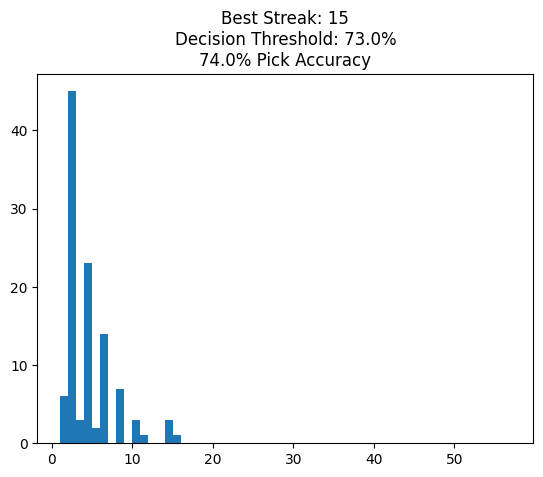

In [29]:
import matplotlib.pyplot as plt

threshold = 0.73
top_two_picks_by_day_df = df[df['hit_prob'] >= threshold].sort_values(['game_date', 'hit_prob'], ascending = [True, False]).groupby('game_date').head(2)

streak, streaks = 0, list()
for game_date, row in top_two_picks_by_day_df.groupby('game_date')['H'].agg(['count', 'min']).iterrows():
    result = row['count'] if row['min'] > 0 else 0
    if result == 0:
        if streak > 0:
            streaks.append(streak)
        streak = 0
    else:
        streak += result
if streak > 0:
    streaks.append(streak)

plt.hist(streaks, bins = list(range(1, 58)))
plt.title(f"Best Streak: {max(streaks) if len(streaks) > 0 else 0}\nDecision Threshold: {100 * threshold}%\n{100 * round(top_two_picks_by_day_df['H'].astype(bool).mean(), 2)}% Pick Accuracy")
plt.show()

Save Pickle

In [30]:
import pickle

with open('models/log_reg.pkl', 'wb') as log_reg_pkl:
    pickle.dump((scaler, pca, clf), log_reg_pkl)

In [32]:
import pickle

with open('models/log_reg.pkl', 'rb') as log_reg_pkl:
    scaler, pca, clf = pickle.load(log_reg_pkl)
    print(scaler, pca, clf)
    print(clf.coef_)

StandardScaler() PCA(n_components=0.99, random_state=57, svd_solver='full') LogisticRegressionCV(cv=10, random_state=57)
[[-0.08364872  0.00051885  0.00080699  0.01460541  0.00037205 -0.05493153
  -0.00851172 -0.07553821  0.00899924  0.02789828 -0.03532392  0.03097933
  -0.00048223  0.02041507 -0.01816676  0.01587712 -0.00585419 -0.02897475
   0.00204551]]
